# Using TRMM and WHOI for past climate data in Future Projections
This code is use to explore using TRMM and WHOI data as past data to explore percent change

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Future Evap

In [49]:
#####data sets to combine
FGOALS_Evap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/FGOALS3/EvaporationRates.xlsx'
GFDL_Evap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/GFDL_ESM4/GFDL_Evaporation.xlsx'
EC_EarthEvap = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/EC-Earth3/EC-EarthEvap.xlsx'


In [50]:
def dataRead(data):
    '''
    This function serves to read in all of 
    the regions of interest as dataframes
    '''
    PR = pd.read_excel(data,sheet_name='PuertoRico')
    PR = PR.dropna()
    VZ = pd.read_excel(data,sheet_name='Venezuela')
    VZ = VZ.dropna()
    BH = pd.read_excel(data,sheet_name='Bahamas')
    BH = BH.dropna()
    BZ = pd.read_excel(data,sheet_name='Belize')
    BZ = BZ.dropna()
    CB = pd.read_excel(data,sheet_name='Cuba')
    CB = CB.dropna()
    MX = pd.read_excel(data,sheet_name='Mexico')
    MX = MX.dropna()
    FL = pd.read_excel(data,sheet_name='Florida')
    FL = FL.dropna()

    
    return PR, VZ, BH, BZ, CB, MX, FL

In [51]:
##Data Read
PR_FGoals, VZ_FGoals, BH_FGoals, BZ_FGoals, CB_FGoals, MX_FGoals, FL_FGoals=dataRead(FGOALS_Evap) ##FGOALS
PR_GFDL, VZ_GFDL, BH_GFDL, BZ_GFDL, CB_GFDL, MX_GFDL, FL_GFDL=dataRead(GFDL_Evap) ##GFDL
PR_EC, VZ_EC, BH_EC, BZ_EC, CB_EC, MX_EC, FL_EC=dataRead(EC_EarthEvap) ##EC_EarthEvap

In [69]:
print(np.mean(CB_FGoals['E26_Year']))
print(np.mean(CB_FGoals['E45_Year']))
print(np.mean(CB_FGoals['E70_Year']))

2.830148655076818
2.8987590988928122
2.9536098080400714


In [53]:
##### Get evaporation data


def getEvap(FGoals,GFDL,EC):
    '''
    This function works to take all 
    of the evaporation data for SSP 2.6,
    SSP 4.5 and SSP 7.0 and average the 
    3 models
    '''
    E26_F= np.array(FGoals['E26_Year'])
    E26_G = np.array(GFDL['E26_Year'])
    E26_EC = np.array(EC['E26_Year'])
    Evap26 = np.mean(np.array([E26_F,E26_G,E26_EC]))
    
    E45_F= np.array(FGoals['E45_Year'])
    E45_G = np.array(GFDL['E45_Year'])
    E45_EC = np.array(EC['E45_Year'])
    Evap45 = np.mean(np.array([E45_F,E45_G,E45_EC]))
    
    E70_F= np.array(FGoals['E70_Year'])
    E70_G = np.array(GFDL['E70_Year'])
    E70_EC = np.array(EC['E70_Year'])
    Evap70 = np.mean(np.array([E70_F,E70_G,E70_EC])) 
    
    return Evap26, Evap45, Evap70
    

In [54]:
###future Evap

PR26E,PR45E,PR70E = getEvap(PR_FGoals,PR_GFDL,PR_EC)
VZ26E,VZ45E,VZ70E = getEvap(VZ_FGoals,VZ_GFDL,VZ_EC)
BH26E,BH45E,BH70E = getEvap(BH_FGoals,BH_GFDL,BH_EC)
BZ26E,BZ45E,BZ70E = getEvap(BZ_FGoals,BZ_GFDL,BZ_EC)
MX26E,MX45E,MX70E = getEvap(MX_FGoals,MX_GFDL,MX_EC)
FL26E,FL45E,FL70E = getEvap(FL_FGoals,FL_GFDL,FL_EC)
CB26E,CB45E,CB70E = getEvap(CB_FGoals,CB_GFDL,CB_EC)


(2.4180458906798266, 2.469060155813332, 2.513738590867047)

In [55]:
PrecipData = '/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/ClimateProjectionsData/PrecipitationDataAllThree.xlsx'
def readPrecip(data):
    GFDL26 = pd.read_excel(data,sheet_name='GFDL_26')
    GFDL26= GFDL26.dropna()
    GFDL45 = pd.read_excel(data,sheet_name='GFDL_45')
    GFDL45= GFDL45.dropna()
    GFDL70 = pd.read_excel(data,sheet_name='GFDL_70')
    GFDL70= GFDL70.dropna()
        
    FGOALS26 = pd.read_excel(data,sheet_name='FGOALS_26')
    FGOALS26 = FGOALS26.dropna()
    FGOALS45 = pd.read_excel(data,sheet_name='FGOALS_45')
    FGOALS45 = FGOALS45.dropna()
    FGOALS70 = pd.read_excel(data,sheet_name='FGOALS_70')
    FGOALS70 = FGOALS70.dropna()
    
    ECEarth_26 = pd.read_excel(data,sheet_name='ECEarth_26')
    ECEarth_26 = ECEarth_26.dropna()
    ECEarth_45 = pd.read_excel(data,sheet_name='ECEarth_45') 
    ECEarth_45 = ECEarth_45.dropna()
    ECEarth_70 = pd.read_excel(data,sheet_name='ECEarth_70')
    ECEarth_70 = ECEarth_70.dropna()
        
    return GFDL26, GFDL45, GFDL70, FGOALS26, FGOALS45, FGOALS70, ECEarth_26, ECEarth_45, ECEarth_70

In [56]:
GFDL26, GFDL45, GFDL70, FGOALS26, FGOALS45, FGOALS70, ECEarth_26, ECEarth_45, ECEarth_70 = readPrecip(PrecipData)

In [57]:
###calculate future values
PR26_P = np.mean(np.array([GFDL26['Puerto Rico'],FGOALS26['Puerto Rico'],ECEarth_26['Puerto Rico']]))/1000
PR45_P = np.mean(np.array([GFDL45['Puerto Rico'],FGOALS45['Puerto Rico'],ECEarth_45['Puerto Rico']]))/1000
PR70_P = np.mean(np.array([GFDL70['Puerto Rico'],FGOALS70['Puerto Rico'],ECEarth_70['Puerto Rico']]))/1000

VZ26_P = np.mean(np.array([GFDL26['Venezuela'],FGOALS26['Venezuela'],ECEarth_26['Venezuela']]))/1000
VZ45_P = np.mean(np.array([GFDL45['Venezuela'],FGOALS45['Venezuela'],ECEarth_45['Venezuela']]))/1000
VZ70_P = np.mean(np.array([GFDL70['Venezuela'],FGOALS70['Venezuela'],ECEarth_70['Venezuela']]))/1000

MX26_P = np.mean(np.array([GFDL26['Mexico'],FGOALS26['Mexico'],ECEarth_26['Mexico']]))/1000
MX45_P = np.mean(np.array([GFDL45['Mexico'],FGOALS45['Mexico'],ECEarth_45['Mexico']]))/1000
MX70_P = np.mean(np.array([GFDL70['Mexico'],FGOALS70['Mexico'],ECEarth_70['Mexico']]))/1000

BZ26_P = np.mean(np.array([GFDL26['Belize'],FGOALS26['Belize'],ECEarth_26['Belize']]))/1000
BZ45_P = np.mean(np.array([GFDL45['Belize'],FGOALS45['Belize'],ECEarth_45['Belize']]))/1000
BZ70_P = np.mean(np.array([GFDL70['Belize'],FGOALS70['Belize'],ECEarth_70['Belize']]))/1000

BH26_P = np.mean(np.array([GFDL26['Bahamas'],FGOALS26['Bahamas'],ECEarth_26['Bahamas']]))/1000
BH45_P = np.mean(np.array([GFDL45['Bahamas'],FGOALS45['Bahamas'],ECEarth_45['Bahamas']]))/1000
BH70_P = np.mean(np.array([GFDL70['Bahamas'],FGOALS70['Bahamas'],ECEarth_70['Bahamas']]))/1000

FL26_P = np.mean(np.array([GFDL26['Florida'],FGOALS26['Florida'],ECEarth_26['Florida']]))/1000
FL45_P = np.mean(np.array([GFDL45['Florida'],FGOALS45['Florida'],ECEarth_45['Florida']]))/1000
FL70_P = np.mean(np.array([GFDL70['Florida'],FGOALS70['Florida'],ECEarth_70['Florida']]))/1000

CB26_P = np.mean(np.array([GFDL26['Cuba'],FGOALS26['Cuba'],ECEarth_26['Cuba']]))/1000
CB45_P = np.mean(np.array([GFDL45['Cuba'],FGOALS45['Cuba'],ECEarth_45['Cuba']]))/1000
CB70_P = np.mean(np.array([GFDL70['Cuba'],FGOALS70['Cuba'],ECEarth_70['Cuba']]))/1000

In [58]:
### Future Enet
EnetPR26_Future = (PR26E-PR26_P)
EnetPR45_Future = (PR45E-PR45_P)
EnetPR70_Future = (PR70E-PR70_P)

EnetVZ26_Future = (VZ26E-VZ26_P)
EnetVZ45_Future = (VZ45E-VZ45_P)
EnetVZ70_Future = (VZ70E-VZ70_P)

EnetBZ26_Future = (BZ26E-BZ26_P)
EnetBZ45_Future = (BZ45E-BZ45_P)
EnetBZ70_Future = (BZ70E-BZ70_P)

EnetBH26_Future = (BH26E-BH26_P)
EnetBH45_Future = (BH45E-BH45_P)
EnetBH70_Future = (BH70E-BH70_P)

EnetCB26_Future = (CB26E-CB26_P)
EnetCB45_Future = (CB45E-CB45_P)
EnetCB70_Future = (CB70E-CB70_P)

EnetFL26_Future = (FL26E-FL26_P)
EnetFL45_Future = (FL45E-FL45_P)
EnetFL70_Future = (FL70E-FL70_P)

EnetMX26_Future = (MX26E-MX26_P)
EnetMX45_Future = (MX45E-MX45_P)
EnetMX70_Future = (MX70E-MX70_P)


EnetPR26_Future

2.378651743393005

## Past Enet

In [59]:
Past_Enet_TRMMWhoi = pd.read_excel('/Users/isamarcortes/Dropbox/Isamar/Papers_In_Prep/Paper_1/SupplementaryMaterial/DatabaseFinalized.xlsx')


PR_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[1]
BZ_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[6]
MX_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[7]
FL_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[9]
BH_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[14]
VZ_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[15]
CB_Past = Past_Enet_TRMMWhoi['Enet (m/yr)'].values[17]

print(PR_Past,BZ_Past,MX_Past,FL_Past,BH_Past,VZ_Past,CB_Past)

1.1525372859258889 0.318873811925705 0.920389313799055 0.9800915437628999 0.863352875403797 0.716822198068465 1.0291596190535


In [60]:
## Percent change
Percent26PR = ((EnetPR26_Future-PR_Past)/ EnetPR26_Future)*-100
Percent45PR = ((EnetPR45_Future-PR_Past)/ EnetPR45_Future)*-100
Percent70PR = ((EnetPR70_Future-PR_Past)/ EnetPR70_Future)*-100

Percent26BZ = ((EnetBZ26_Future-BZ_Past)/ EnetBZ26_Future)*-100
Percent45BZ = ((EnetBZ45_Future-BZ_Past)/ EnetBZ45_Future)*-100
Percent70BZ = ((EnetBZ70_Future-BZ_Past)/ EnetBZ70_Future)*-100

Percent26BH = ((EnetBH26_Future-BH_Past)/ EnetBH26_Future)*-100
Percent45BH = ((EnetBH45_Future-BH_Past)/ EnetBH45_Future)*-100
Percent70BH = ((EnetBH70_Future-BH_Past)/ EnetBH70_Future)*-100

Percent26MX = ((EnetMX26_Future-MX_Past)/ EnetMX26_Future)*-100
Percent45MX = ((EnetMX45_Future-MX_Past)/ EnetMX45_Future)*-100
Percent70MX = ((EnetMX70_Future-MX_Past)/ EnetMX70_Future)*-100

Percent26FL = ((EnetFL26_Future-FL_Past)/ EnetFL26_Future)*-100
Percent45FL = ((EnetFL45_Future-FL_Past)/ EnetFL45_Future)*-100
Percent70FL = ((EnetFL70_Future-FL_Past)/ EnetFL70_Future)*-100

Percent26CB = ((EnetCB26_Future-CB_Past)/ EnetCB26_Future)*-100
Percent45CB = ((EnetCB45_Future-CB_Past)/ EnetCB45_Future)*-100
Percent70CB = ((EnetCB70_Future-CB_Past)/ EnetCB70_Future)*-100

Percent26VZ = ((EnetVZ26_Future-VZ_Past)/ EnetVZ26_Future)*-100
Percent45VZ = ((EnetVZ45_Future-VZ_Past)/ EnetVZ45_Future)*-100
Percent70VZ = ((EnetVZ70_Future-VZ_Past)/ EnetVZ70_Future)*-100


Dataset = [['Puerto Rico',Percent26PR,'SSP 2.6'],['Puerto Rico',Percent45PR,'SSP 4.5'],['Puerto Rico',Percent70PR,'SSP 7.0'],
           ['Belize',Percent26BZ,'SSP 2.6'],['Belize',Percent45BZ,'SSP 4.5'],['Belize',Percent70BZ,'SSP 7.0'],
           ['Bahamas',Percent26BH,'SSP 2.6'],['Bahamas',Percent45BH,'SSP 4.5'],['Bahamas',Percent70BH,'SSP 7.0'],
           ['Mexico',Percent26MX,'SSP 2.6'],['Mexico',Percent45MX,'SSP 4.5'],['Mexico',Percent70MX,'SSP 7.0'],
           ['Florida',Percent26FL,'SSP 2.6'],['Florida',Percent45FL,'SSP 4.5'],['Florida',Percent70FL,'SSP 7.0'],
           ['Cuba',Percent26CB,'SSP 2.6'],['Cuba',Percent45CB,'SSP 4.5'],['Cuba',Percent70CB,'SSP 7.0'],
           ['Venezuela',Percent26VZ,'SSP 2.6'],['Venezuela',Percent45VZ,'SSP 4.5'],['Venezuela',Percent70VZ,'SSP 7.0'],
          ]

In [61]:
df = pd.DataFrame(Dataset, columns=['Region', 'Percent Change','SSP Scenario'])
df

,Region,Percent Change,SSP Scenario
0,Puerto Rico,-51.546615,SSP 2.6
1,Puerto Rico,-52.519568,SSP 4.5
2,Puerto Rico,-53.587666,SSP 7.0
3,Belize,-87.162752,SSP 2.6
4,Belize,-87.534271,SSP 4.5
5,Belize,-87.795111,SSP 7.0
6,Bahamas,-68.067605,SSP 2.6
7,Bahamas,-68.814419,SSP 4.5
8,Bahamas,-69.470903,SSP 7.0
9,Mexico,-67.957907,SSP 2.6


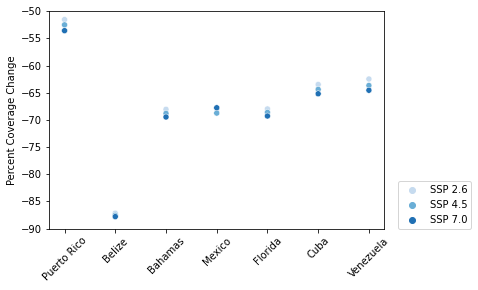

In [66]:
sns.scatterplot(data=df,x='Region',y='Percent Change',hue='SSP Scenario',palette='Blues')
plt.xlabel('')
plt.ylim(-90,-50)
plt.axhline(y=0, color='r', linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('Percent Coverage Change')
plt.legend(loc=(1.04, 0))